# Analyze A/B Test Results

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists. It is important that you get some practice working with the difficulties of these.

For this project, you will be working to understand the results of an A/B test run by an e-commerce website. The company has developed a new web page in order to try and increase the number of users who "convert," meaning the number of users who decide to pay for the company's product. Your goal is to work through this notebook to help the company understand if they should implement this new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('data/ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
print('The number of rows in the dataset is:', df.shape[0])

The number of rows in the dataset is: 294478


c. The number of unique users in the dataset.

In [4]:
print('The number of unique users in the dataset is:', df['user_id'].nunique())

The number of unique users in the dataset is: 290584


d. The proportion of users converted.

In [5]:
converted = df.query('converted == "1"')
print('The proportion of users converted is:', converted.shape[0]/df.shape[0])

The proportion of users converted is: 0.11965919355605512


e. The number of times the `new_page` and `treatment` don't match.

In [6]:
group1 = df.query('group!="treatment" and landing_page=="new_page"')
group2 = df.query('group!="control" and landing_page=="old_page"')
print("The number of times the new_page and treatment don't match is:", group1.shape[0]+group2.shape[0])

The number of times the new_page and treatment don't match is: 3893


f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


> We can see that the dataframe has no missing values.

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# drop the rows in group1 and group2 from df using outer join, and store as df2 
df2 = pd.merge(df, group1, how='outer', indicator=True).query('_merge == "left_only"').drop('_merge', 1)
df2 = pd.merge(df2, group2, how='outer', indicator=True).query('_merge == "left_only"').drop('_merge', 1)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
print('The number of unique users in the dataset is:', df2['user_id'].nunique())

The number of unique users in the dataset is: 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2['user_id'][df2['user_id'].duplicated()]

2878    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
dupe = df2['user_id'].duplicated()
df2[dupe]

,user_id,timestamp,group,landing_page,converted
2878,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2['user_id'].drop_duplicates(inplace=True)
sum(df2['user_id'].duplicated())

0

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
print('The probability of an individual converting regardless of the page they receive is:', df2.converted.mean())

The probability of an individual converting regardless of the page they receive is: 0.11959667567149027


b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
prob_con_c = df2.query('group == "control"').converted.mean()
print('Given that an individual was in the control group, the probability they converted is:', prob_con_c)

Given that an individual was in the control group, the probability they converted is: 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
prob_con_t = df2.query('group == "treatment"').converted.mean()
print("Given that an individual was in the treatment group, the probability they converted:", prob_con_t)

Given that an individual was in the treatment group, the probability they converted: 0.11880724790277405


d. What is the probability that an individual received the new page?

In [17]:
prob_new_page = df2.query('landing_page == "new_page"').shape[0]/df2.shape[0]
print("The probability that an individual received the new page is:", prob_new_page)

The probability that an individual received the new page is: 0.5000636646764286


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here:**
I don't think that there is sufficient evidence to conclude that the new treatment page leads to more conversions, since the probability of the users converting are essentially the same in both groups.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here:**
> - **Null:** The new page is equally good or worse than the old page. 
> - **Alternative:** The new page is better than the old page.  

Which is:
> - **Null:** $p_{new}$ - $p_{old}$ <= 0
> - **Alternative:** $p_{new}$ - $p_{old}$ > 0 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [18]:
p_new = df2['converted'].mean()
p_new

0.11959667567149027

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [19]:
p_old = p_new
p_old

0.11959667567149027

c. What is $n_{new}$, the number of individuals in the treatment group?

In [20]:
n_new = df2.query('group == "treatment"').user_id.nunique()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [21]:
n_old = df2.query('group == "control"').user_id.nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
new_page_converted = np.random.choice([1, 0], size = n_new, p = [p_new, 1 - p_new])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted = np.random.choice([1, 0], size = n_old, p = [p_old, 1 - p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
p_diff = new_page_converted.mean() - old_page_converted.mean()
p_diff

0.001656626025888841

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [25]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([1, 0], size = n_new, replace=True, p = [p_new, 1 - p_new]) 
    old_page_converted = np.random.choice([1, 0], size = n_old, replace=True, p = [p_old, 1 - p_old])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

> **Conclusion:** It does make sense to me. According to the Central Limit Theorem, if I have a population mean mu and a standard deviation sigma, with sufficiently large number of samples taken from this population, I will be able to obain a distribution that is normally shaped.

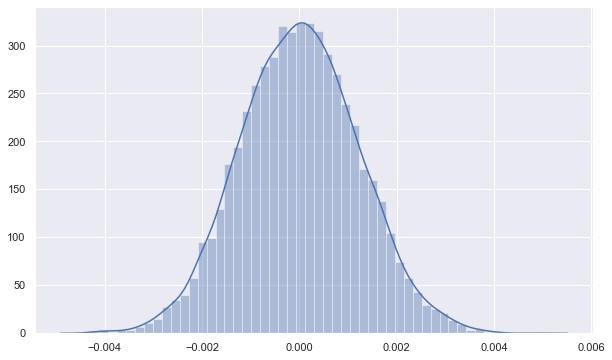

In [26]:
p_diffs = np.array(p_diffs)

plt.figure(figsize=[10,6])
sns.distplot(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

0.9003

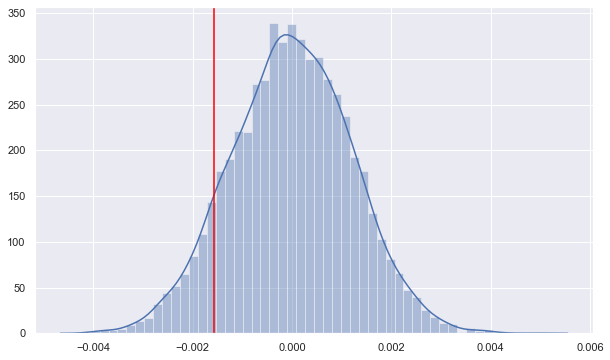

In [27]:
plt.figure(figsize=[10,6])

null_vals = np.random.normal(0, np.std(p_diffs), p_diffs.size)

actual_diff = df2.query('group == "treatment"').converted.mean() - df2.query('group == "control"').converted.mean()
sns.distplot(null_vals)
plt.axvline(x=actual_diff, color='red')
(null_vals > actual_diff).mean()

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.** In part J, I obtained a value of 0.9, which is referred to as the p-value. By definition, p-value is the probability of observing test results as or more extreme than the actual observed results, based on the premise that the null hypothesis is true. It is the evidence against the null hypothesis. In short, p is low then null must go. In this case, a p-value of 0.9 suggests that 90% of the simulated results (from my 10000 values) are the same or larger than observed values in the original dataset. Since the p-value computed is greater than 0.05, hence, I fail to reject the null hypothesis and there is not much difference between the old and new page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [59]:
import statsmodels.api as sm

convert_old = df2.query('group == "control"').converted.sum()
convert_new = df2.query('group == "treatment"').converted.sum()
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [67]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score, p_value)

1.3116075339133115 0.905173705140591


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here:**
The p-value I computed using stats.proportions_ztest agrees with my findings in part J and K. Since I obtained a p-value of 0.9, it means that 90% of my simulated distribution is as or more extreme as the observed difference in the original dataset. It also means that there is not much difference between the simulated distribution and the actual observed difference. Therefore, I fail to reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here:** Logistic Regression, since the variable we are trying to predict is categorical.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [80]:
df2['intercept'] = 1
df2[['new_page', 'old_page']] = pd.get_dummies(df2['landing_page'])
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

In [81]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,old_page,new_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [83]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [84]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Sun, 14 Jun 2020   Pseudo R-squ.:               8.085e-06
Time:                        22:13:02   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Put your answer here:** The p-value for ab_page is 0.19. The reason that it differs is that here, we are conducting a 2-tailed t-test.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here:** Sometimes, adding other features may help with the accuracy of the model. However, issues such as multicolinearity arises, which states that adding new variables may impare the model's performance given that they may be highly correlated with other variables.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [85]:
country = pd.read_csv('data/countries.csv')
country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [ ]:
df2 = df2.join(country.set_index('user_id'), on='user_id')

In [104]:
df2.head(3)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,old_page,new_page,country,US,UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,US,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,US,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,US,1,0


In [105]:
df2[['US', 'UK']] = pd.get_dummies(df2['country'])[['US', 'UK']]
df2.head(3)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,old_page,new_page,country,US,UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,US,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,US,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,US,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [106]:
df2['US_ab_page'] = df2['US'] * df2['ab_page']
df2['UK_ab_page'] = df2['UK'] * df2['ab_page']

In [107]:
df2.head(3)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,old_page,new_page,country,US,UK,US_ab_page,UK_ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,US,1,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,US,1,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,US,1,0,1,0


In [110]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'US', 'UK', 'ab_page', 'US_ab_page', 'UK_ab_page']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            5
Date:                Sun, 14 Jun 2020   Pseudo R-squ.:               3.483e-05
Time:                        22:30:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1918
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
US_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
UK_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
==============================================================================
"""

<a id='conclusions'></a>
>**Conclusions:** Since all of the p-values are larger than 0.05, we conclude that there is no sufficient evidence suggesting that there is an interaction between country and page. We also failed to reject the null hypothesis.